In [4]:
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
import matplotlib.pyplot as plt

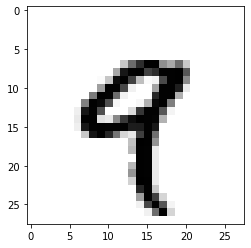

In [11]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

train_images 와 train_labels 를 분리하여 준비했으나 사실 하나의 벡터에서 하나의 요소가 라벨 나머지가 데이터라고 생각할 수도 있다. 
핵심은 훈련 데이터로 네트워크를 학습시키고 테스트 데이터로 네트워크를 테스트하는 것이다. 

In [12]:
from keras import models
from keras import layers

print(type(train_images.shape))
print(train_images.shape[1:])

input_shape = train_images.shape[1:]

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

<class 'tuple'>
(28, 28)


소프트멕스는 전체의 합이 1이 되도록 하는 확률 값을 반환하는 계층이다.

- 손실함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법. 네트워크가 올바른 방향으로 학습될 수 있도록 한다.
- 옵티마이저 : 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트 하는 메커니즘.
- 훈련과 테스트 과정에서의 모니터링 지표 : 정확도

In [13]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [14]:
train_images2 = train_images.reshape((60000, 28 * 28))
train_images2 = train_images2.astype('float32') / 255

test_images2 = test_images.reshape((10000, 28 * 28))
test_images2 = test_images2.astype('float32') / 255

In [15]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
network.fit(train_images2, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2577 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.1033 - accuracy: 0.9695
Epoch 3/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0674 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0487 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.0375 - accuracy: 0.9888


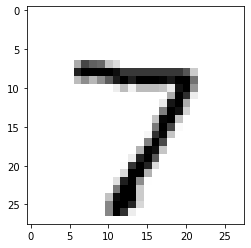

(10000, 10)
[7.7255864e-09 8.0278791e-11 1.9245856e-06 3.5871158e-06 3.3807106e-12
 3.7663712e-09 6.5859590e-14 9.9999440e-01 1.5112237e-08 7.1655023e-08]
예상 번호 :  7
실제 번호 :  7


In [17]:
import numpy as np

digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

predictions = network.predict(test_images2)
print(predictions.shape)
print(predictions[0])
print("예상 번호 : ", np.argmax(predictions[0]))
print("실제 번호 : ", np.argmax(test_labels[0]))

In [18]:
test_loss, test_acc = network.evaluate(test_images2, test_labels)

10000/10000 [==============================] - 1s 51us/step


In [19]:
print('test_acc:', test_acc)

test_acc: 0.9800999760627747


- data distillation : 데이터 증류, 뉴럴 네트워크의 각각의 계층은 입력에서 특징을 추출하여 다음 계층으로 전달한다. 
따라서 누적된 계층은 데이터의 엑기스를 뽑아내는 형태로 바라볼 수 있고 이를 데이터 증류라고 표현할 수 있다. 

Scalars (0D tensors)

In [20]:
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)

12
0


Vectors (1D tensors)

In [21]:
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)

[12  3  6 14]
1


Matrix (2D tensors)

In [22]:
x = np.array(
    [
        [5, 78, 2, 34, 0],
        [6, 79, 3, 35, 1],
        [7, 80, 4, 36, 2]
    ])
print(x.ndim)

2


3D tensors

In [23]:
x = np.array(
    [
        [
            [5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]
        ],
        [
            [5, 78, 2, 34, 0], 
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]
        ],
        [
            [5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]
        ]
    ])
print(x.ndim)

3


0차원 텐서는 숫자이고 1차원 텐서는 1차원 배열, 벡터이다. 2차원 텐서는 2차원 배열이고 n차원 텐서는 벡터의 n차원 배열이다. 
축의 갯수 또는 차원이라는 표현은 rank 라고 불리기도 한다. numpy 에서 ndim 으로 표시되는 값이다. 
형태는 각각의 차원의 크기를 나타낸 것으로 2D Tensor (2, 2), 3D Tensor (3, 4, 5) 등으로 표시된다.

In [24]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


slice 의 음수 값은 역방향 인덱스이다. 리스트의 마지막 지점을 0으로 생각하고 역방향으로의 위치이다. 

In [25]:
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(90, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


텐서의 첫번째 축은 항상 샘플 축이라고 불리고 그 크기는 샘플의 크기를 의미한다.
Vector data 의 경우 2D 텐서이고 그 형태는 (samples, features) 형태이다. 
Timeseries data 또는 Sequence data 는 3D 텐서이고 (samples, timesteps, features) 형태이다.
Images 는 4D 텐서이고 (samples, height, width, channel) 또는 (samples, channel, height, width) 형태를 갖는다. 
이미지의 한 픽셀에서 사용되는 색의 갯수를 channel 로 표현한다.
ex) 첫번째 방식에서는 7번 이미지의 (5, 5) 픽셀에는 (r,g,b) 값이 무엇인가?
ex) 두번째 방식에서는 7번 이미지의 r 채널의 (5,5) 픽셀의 값이 무엇인가?
Video 는 5D 텐서이고 (sample, frames, height, width, channels) 또는 (sample, frames, channels, height, width) 형태를 갖는다.

element-wise 연산은 텐서와 텐서의 연산에 있어서 각 연산이 텐서의 요소에 영향을 주는 연산이다. 
예를 들어 형태가 동일한 두 텐서를 더한다는 의미는 두 텐서의 모든 요소를 더한 새로운 텐서를 만든다는 뜻이다. 
기본적으로 element-wise 연산은 두 텐서의 형태가 동일해야 하는데 일반적으로 동일하지 않는 경우가 많다.
이때 Broadcasting 이라는 방식을 사용하여 축의 크기가 작은 텐서의 크기를 조절한다. 

먼저 축을 추가하고 연산 대상의 텐서에 맞게 축의 크기 만큼 복사하여 데이터를 만들어낸다.

In [26]:
def native_relu(x):
    assert len(x.shape) == 2
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

In [27]:
def native_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x